# Air Quality Prediction Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## Load Dataset

In [ ]:
df = pd.read_csv("Air_Quality.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.date
df.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,Hour,Day
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000,0,2024-01-01
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000,1,2024-01-01
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999,2,2024-01-01
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000,3,2024-01-01
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000,4,2024-01-01


## Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,Hour
count,52704.000000,9648.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,462.348259,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339,11.500000
std,159.589953,33.769009,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149,6.922252
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000,0.000000
25%,159.000000,445.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000,5.750000
50%,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835,11.500000
75%,306.000000,467.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089,17.250000
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330,23.000000


In [ ]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Date     datetime64[ns, UTC]
City                  object
CO                   float64
CO2                  float64
NO2                  float64
SO2                  float64
O3                   float64
PM2.5                float64
PM10                 float64
AQI                  float64
Hour                   int32
Day                   object
dtype: object


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
Hour         0
Day          0
dtype: int64


In [ ]:
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 Date      8784
City         6
CO        1094
CO2        245
NO2       1118
SO2       1164
O3         307
PM2.5      858
PM10      1751
AQI      19720
Hour        24
Day        366
dtype: int64


Text(0, 0.5, 'Count')

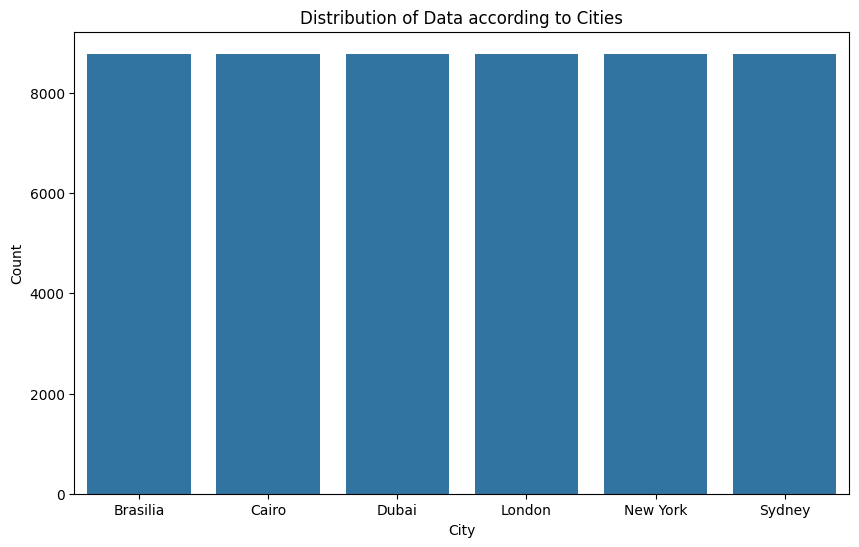

In [ ]:
#Distribution of Data according to cities

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City')
plt.title("Distribution of Data according to Cities")
plt.xlabel("City")
plt.ylabel("Count")

In [ ]:
df['City'].value_counts()

,count
City,
Brasilia,8784
Cairo,8784
Dubai,8784
London,8784
New York,8784
Sydney,8784


In [ ]:
#All cities records are of same count so no biasness in data

In [ ]:
#Mean of all gases according to cities

mean_values = df.groupby('City').agg(
    CO_mean=('CO', 'mean'),
    CO2_mean=('CO2', 'mean'),
    NO2_mean=('NO2', 'mean'),
    SO2_mean=('SO2', 'mean'),
    O3_mean=('O3', 'mean'),
    PM25_mean=('PM2.5', 'mean'),
    PM10_mean=('PM10', 'mean')
)
mean_values

,CO_mean,CO2_mean,NO2_mean,SO2_mean,O3_mean,PM25_mean,PM10_mean
City,,,,,,,
Brasilia,221.450478,445.726368,8.735633,1.619854,57.757286,6.549283,8.886726
Cairo,293.819217,457.920398,32.617634,38.294319,61.102459,23.736054,43.422222
Dubai,440.464026,463.778607,39.488297,20.308971,93.878415,41.574146,111.040619
London,187.744194,475.114428,21.797495,3.326093,49.154030,9.985178,14.136009
New York,283.640027,488.358831,27.804360,6.252550,52.121926,13.359745,18.948406
Sydney,122.430783,443.190920,14.174567,5.617429,46.140255,10.935178,17.424875


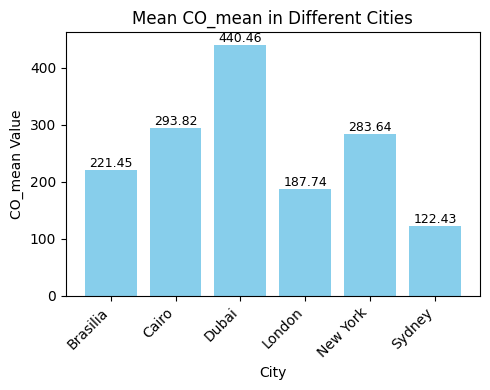

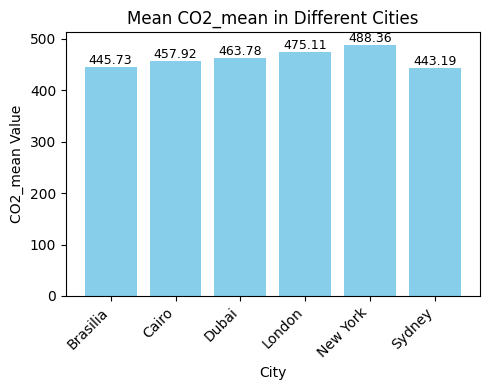

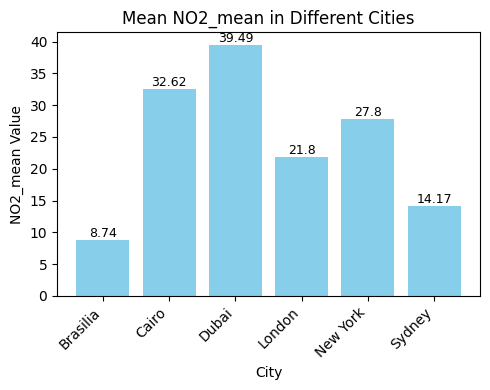

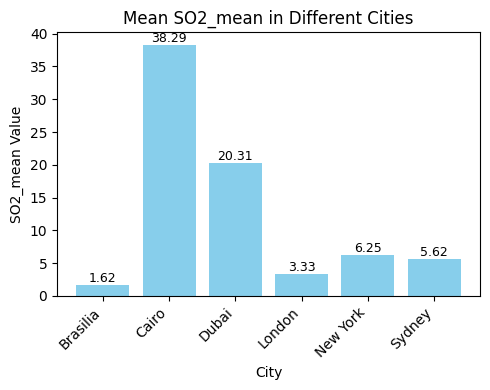

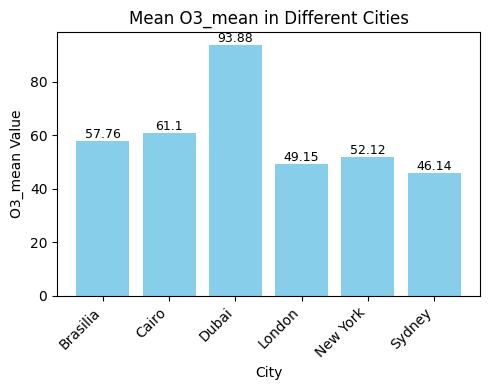

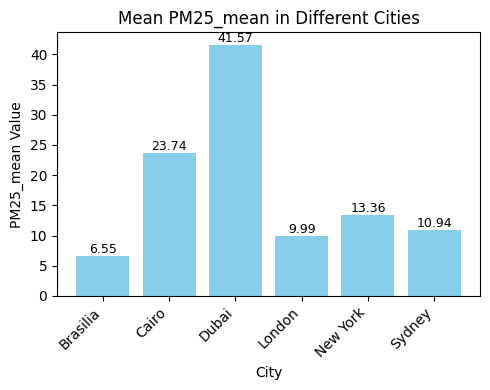

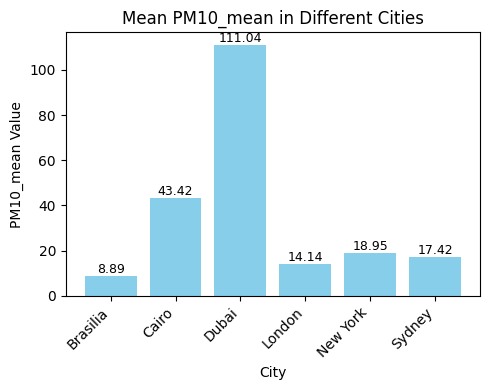

In [ ]:
#Plotting all cities mean using above mean_values

gas_columns = mean_values.columns.tolist()

# Generate and display bar charts for each gas
for col in gas_columns:
    plt.figure(figsize=(5, 4))
    bars = plt.bar(mean_values.index, mean_values[col], color='skyblue')
    plt.xlabel('City')
    plt.ylabel(f'{col} Value')
    plt.title(f'Mean {col} in Different Cities')
    plt.xticks(rotation=45, ha='right')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9) # va: vertical alignment, ha: horizontal alignment
    plt.tight_layout()
    plt.show() # Use plt.show() to display the plots in a notebook



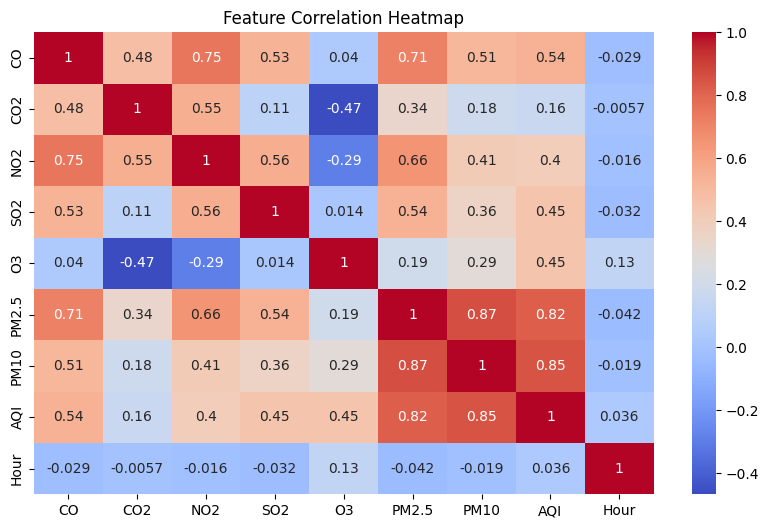

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

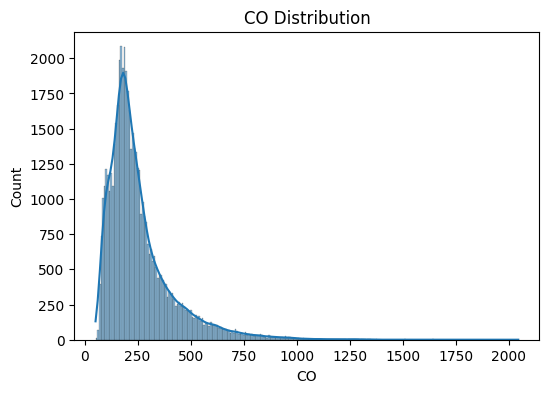

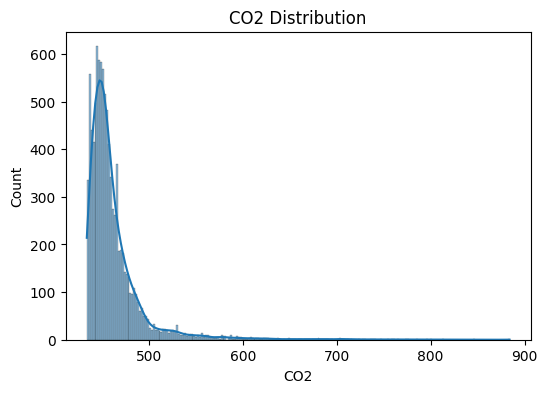

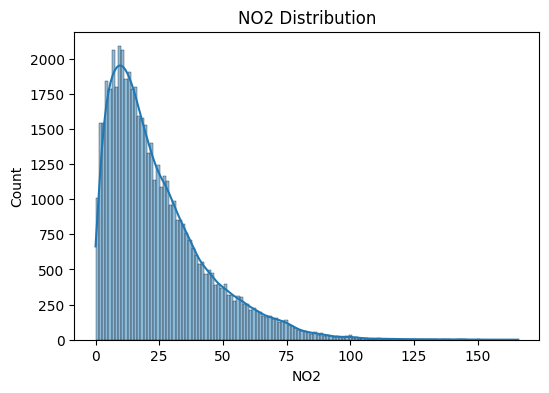

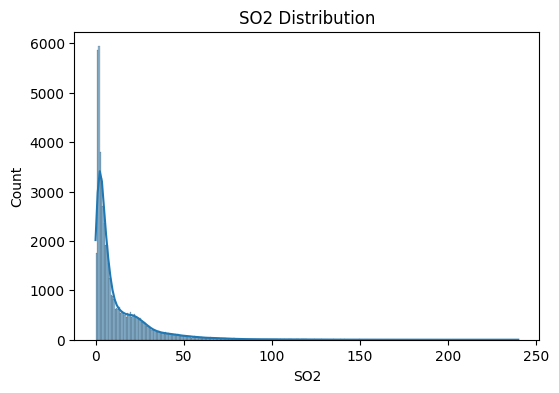

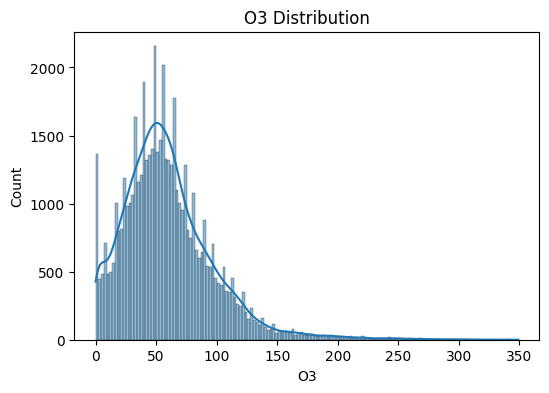

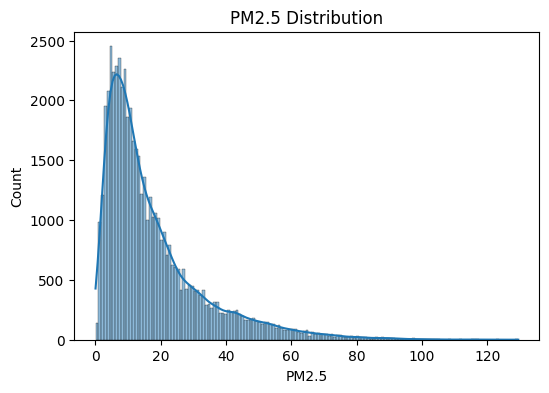

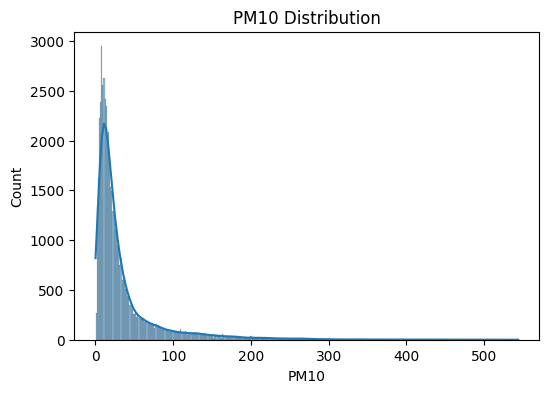

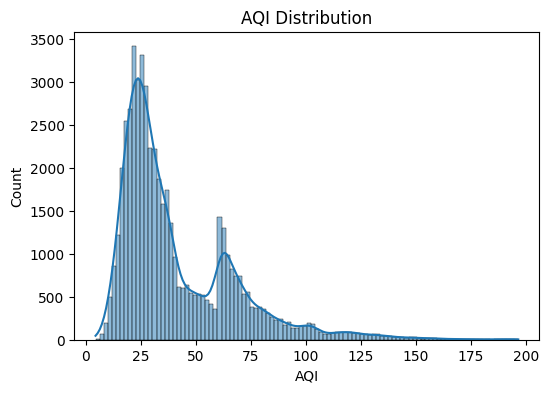

In [ ]:
# Distribution plots
features = ['CO', 'CO2','NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

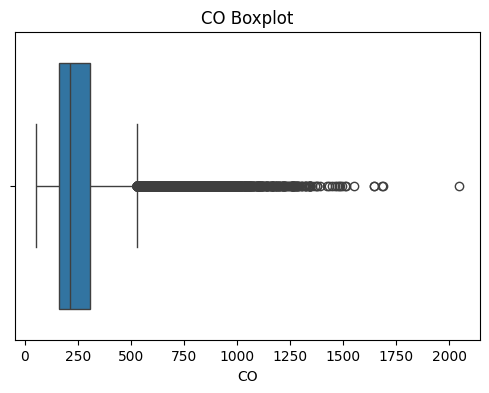

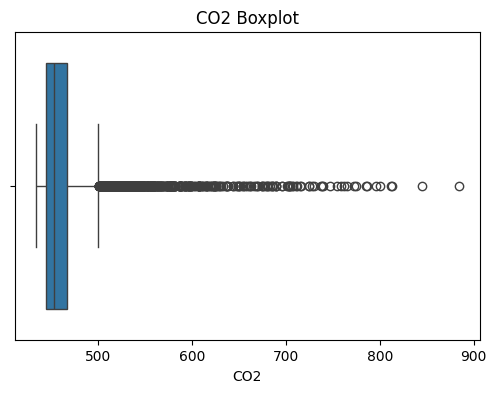

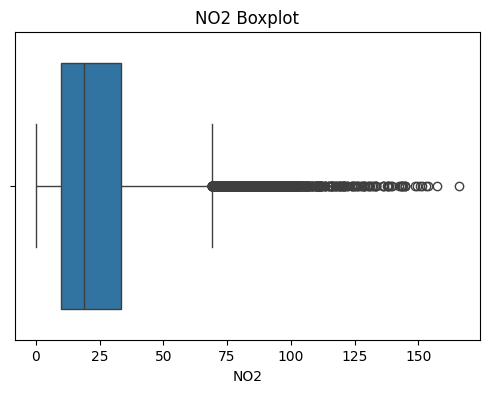

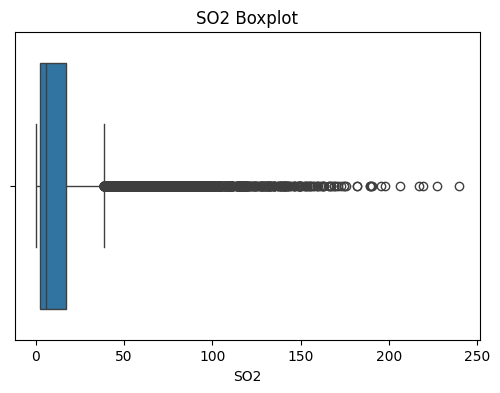

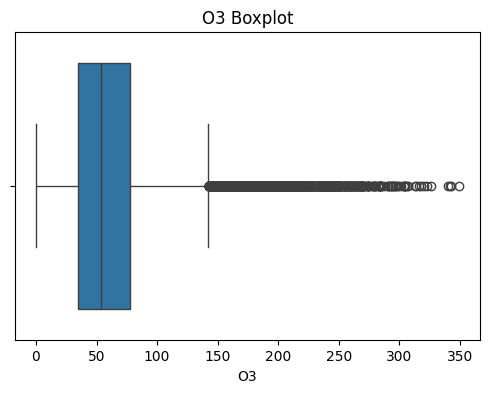

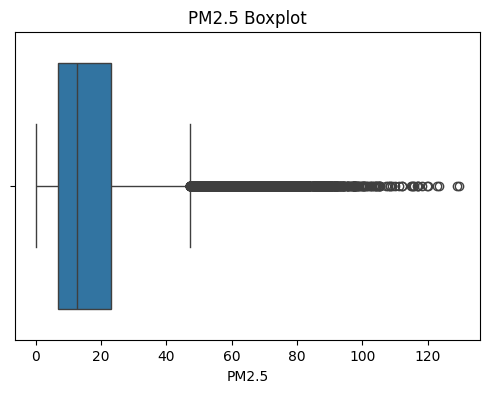

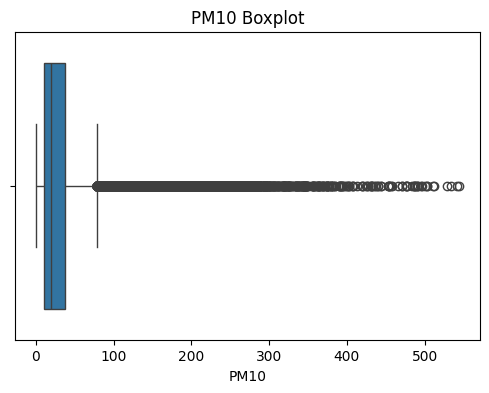

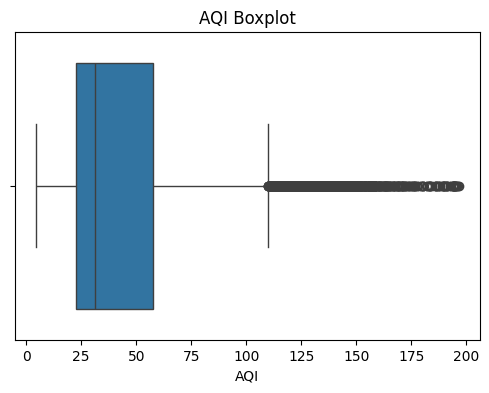

In [ ]:
# Boxplots
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [ ]:
# Grouped by City
cities_aqi = df.groupby("City")["AQI"].mean()
cities_aqi

,AQI
City,
Brasilia,24.749358
Cairo,52.489745
Dubai,85.113722
London,27.097212
New York,32.878247
Sydney,25.767748


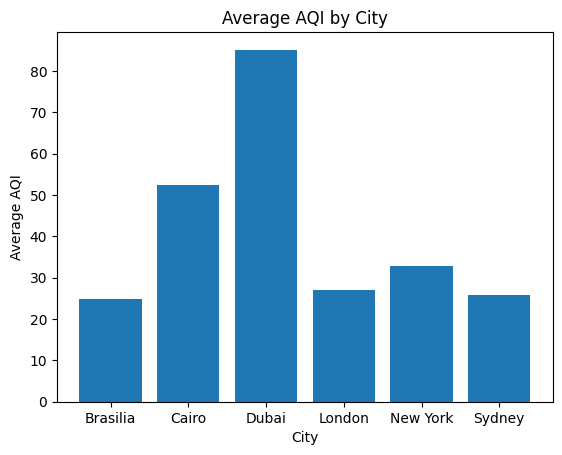

In [ ]:
plt.bar(cities_aqi.index , cities_aqi.values)
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.title("Average AQI by City")
plt.show()

In [ ]:
daily_trend = df.groupby("Day")["AQI"].mean()
daily_trend

,AQI
Day,
2024-01-01,38.784265
2024-01-02,38.523067
2024-01-03,34.603843
2024-01-04,38.563658
2024-01-05,34.319085
...,...
2024-12-27,59.016666
2024-12-28,57.451979
2024-12-29,46.570821


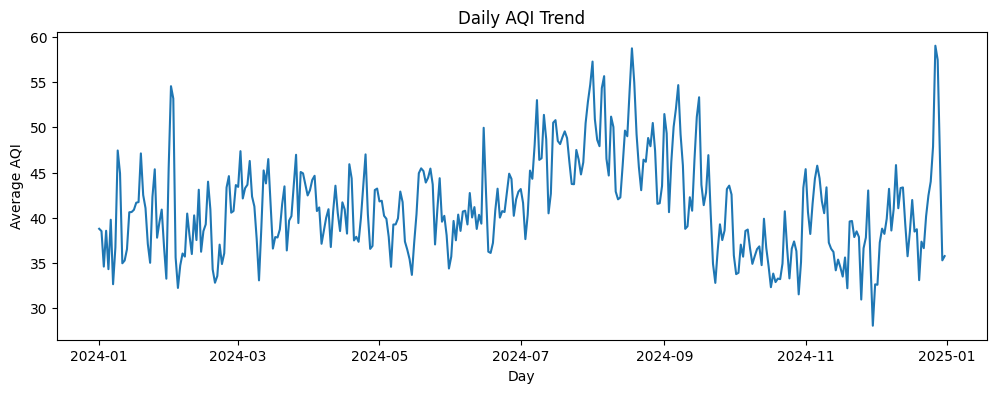

In [ ]:
# Daily AQI trend
daily_trend = df.groupby("Day")["AQI"].mean()
daily_trend.plot(figsize=(12, 4), title="Daily AQI Trend")
plt.ylabel("Average AQI")
plt.show()

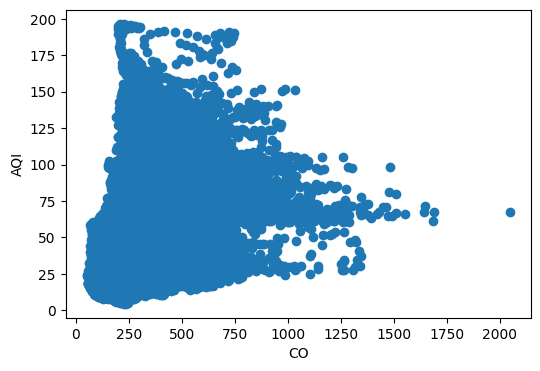

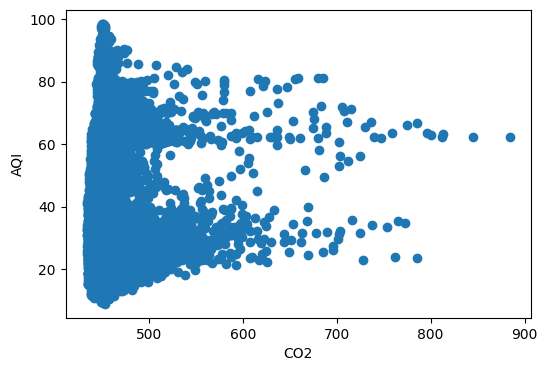

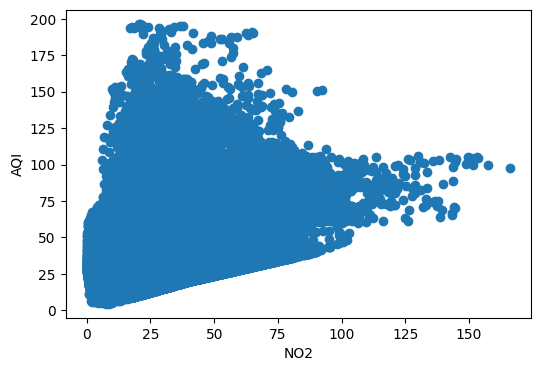

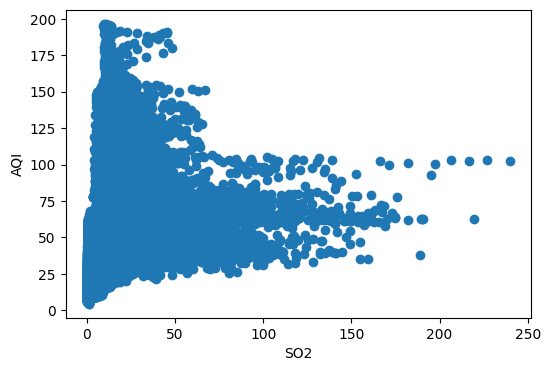

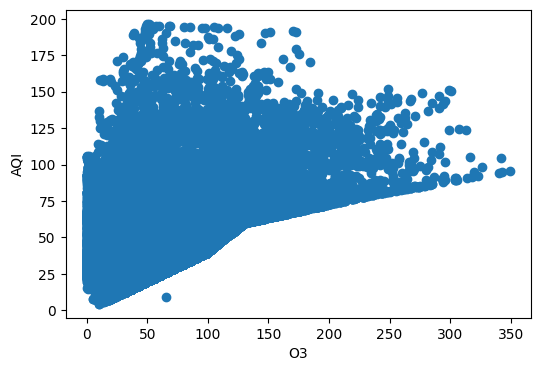

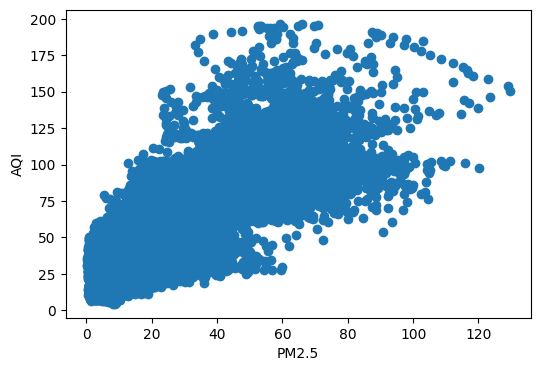

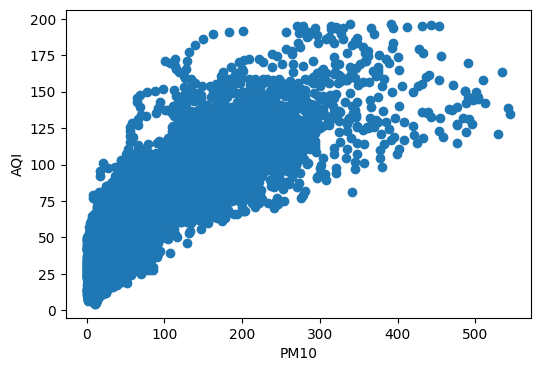

In [ ]:
#Plotting scatter plots of all columns with AQI

features = ['CO','CO2','NO2','SO2','O3','PM2.5','PM10']

for col in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df['AQI'])
    plt.xlabel(col)
    plt.ylabel("AQI")

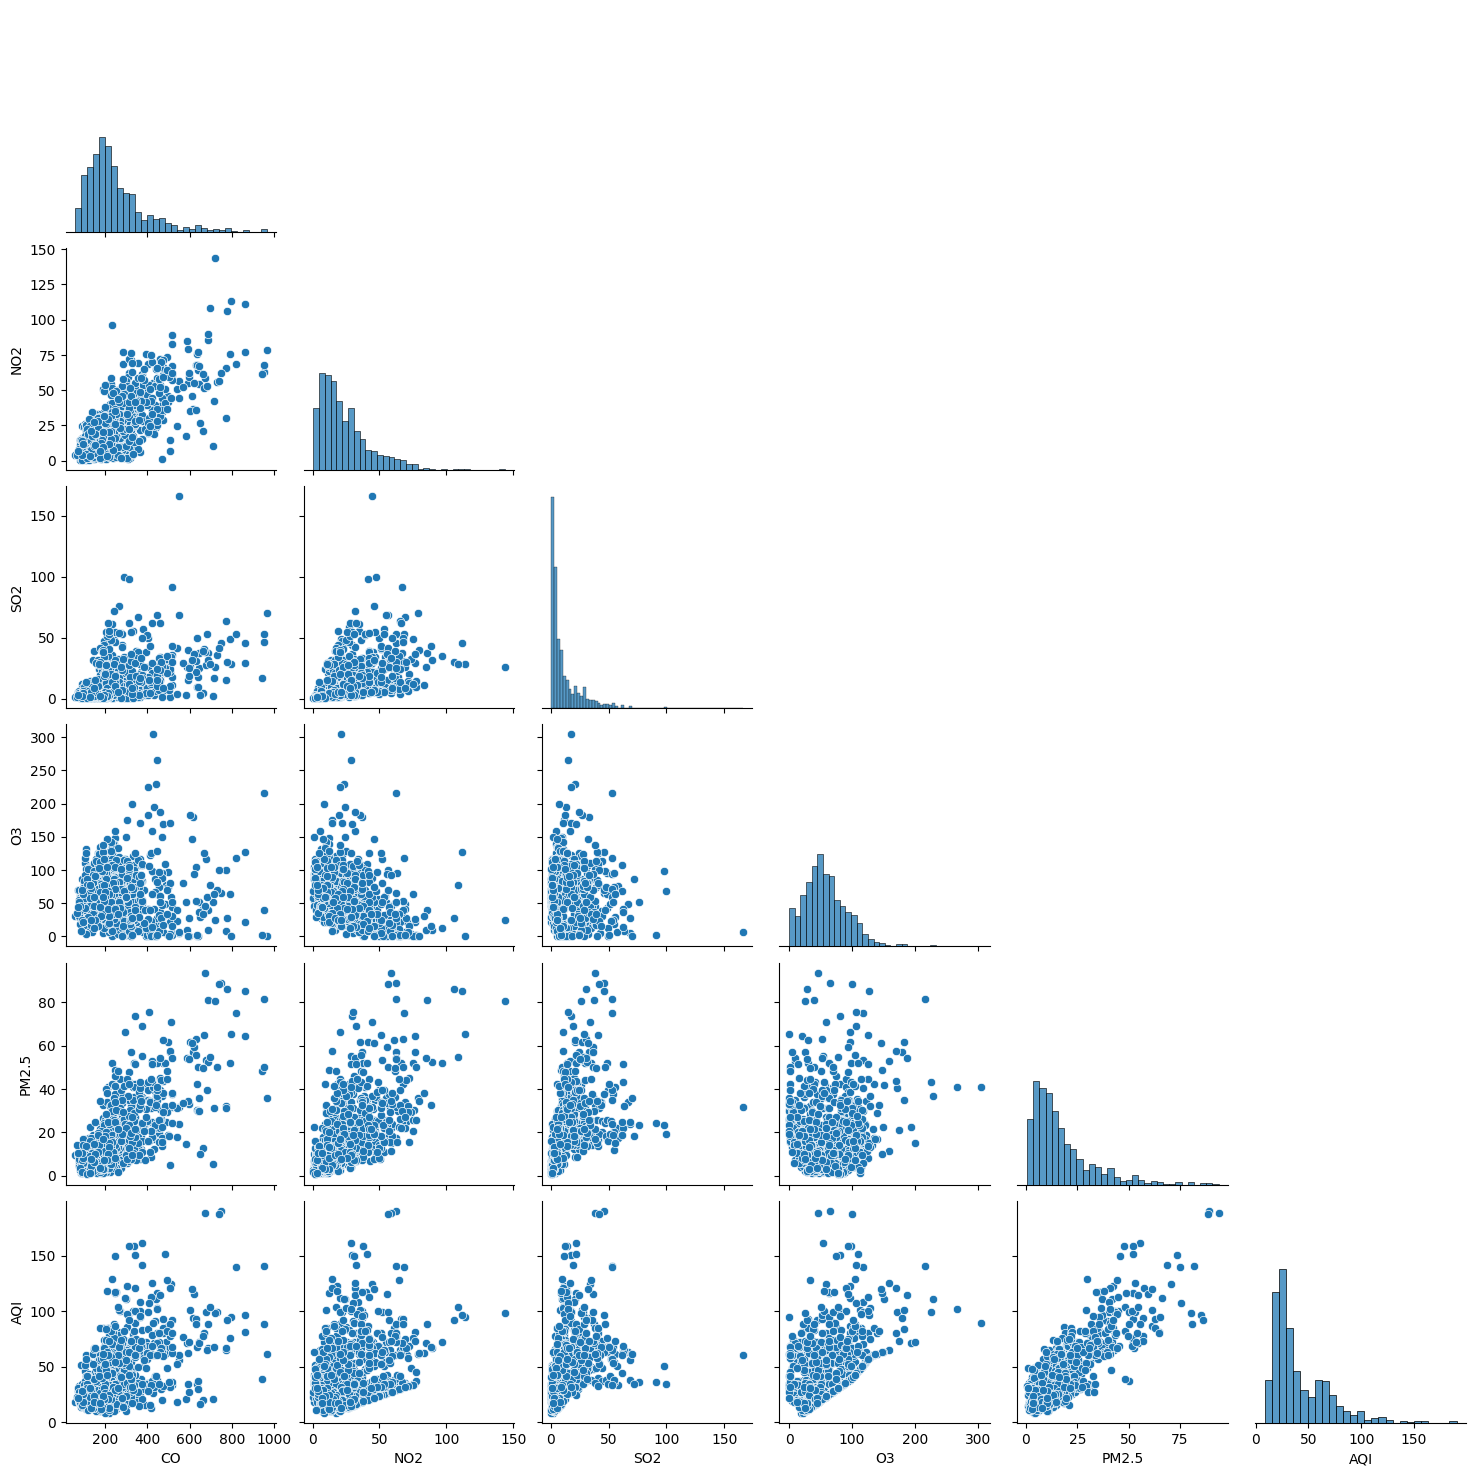

In [ ]:
# Pairplot
sns.pairplot(df[['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'AQI']].sample(1000), corner=True)
plt.show()

## Data Preprocessing and Model Training

In [ ]:
X = df.drop(columns=["AQI", "Date", "Day"])
y = df["AQI"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_cols = ["City"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")



MAE: 4.21
RMSE: 51.67
R2 Score: 0.92


In [ ]:
# Save model
joblib.dump(model_pipeline, "air_quality_model.pkl")